In [1]:
from pylab import *
import pandas as pd

import os, sys
sys.path.append(os.path.abspath('../../'))

In [2]:
# facets
surfs = array(['Pt100', 'Pt110', 'Pt111', 'Ru0001'])
# marker colors
colors = ['C2', 'C1', 'C0', 'C3']
# potentials
Us = array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0])

# Import potential dependent data

In [3]:
FF_dfs = []
PP_dfs = []
for i,s in enumerate(surfs):
    FFdata = pd.read_csv(f'../data/Potential_Dependent_Gs/FF_to_THFA_PDE_{s}.csv')
    FF_dfs += [FFdata]
    PPdata = pd.read_csv(f'../data/Potential_Dependent_Gs/PP_to_PC_PDE_{s}.csv')
    PP_dfs += [PPdata]

# Calculate max barrier of potential dependent steps

## FF to THFA Pathways

In [4]:
# compile to maximum barriers for each facet and potential
barsFF = zeros((4,len(Us)))
for f,df in enumerate(FF_dfs):
    for i,u in enumerate(Us):
        # collect state energies at potential u
        arr = df[f'{u}V vs. RHE']
        # calculate the barriers as G(TS) - G(IS)
        bar = []
        for a,e in enumerate(arr[2:-1]):
            bar.append(e-arr[a+1])
        # add the maximum barrier to the array 
        barsFF[f,i] = max(bar)

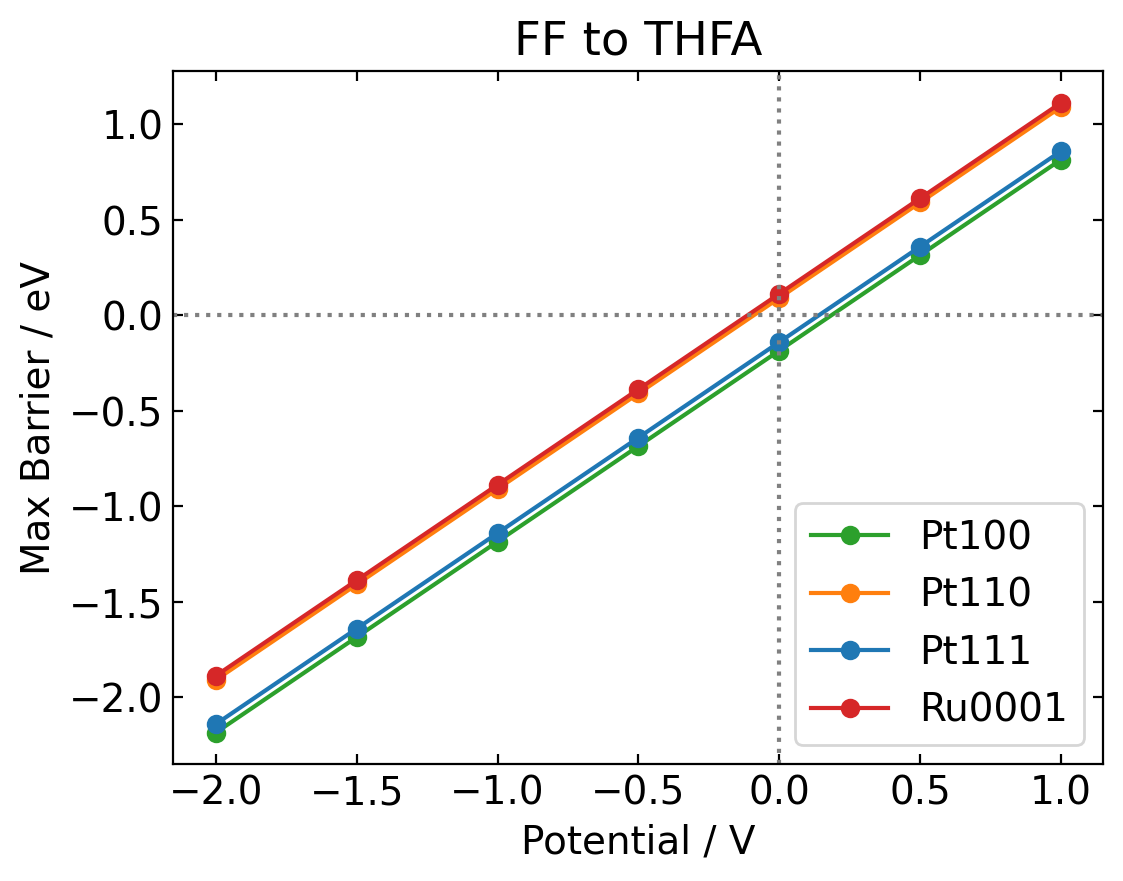

In [5]:
# plot max barrier as a function of potential for each facet
for i,b in enumerate(barsFF):
    plot(Us,b,marker = 'o', color = colors[i], label = surfs[i])
axhline(y=0,linestyle = ':', color = 'gray')
axvline(x=0,linestyle = ':', color = 'gray')
legend()
xlabel('Potential / V')
ylabel('Max Barrier / eV')
title('FF to THFA')
show()

## 4PP to 4PCOL/PC Pathways

In [6]:
# compile to maximum barriers for each facet and potential
barsPP = zeros((4,len(Us)))
for f,df in enumerate(PP_dfs):
    for i,u in enumerate(Us):
        # collect state energies at potential u
        arr = df[f'{u}V vs. RHE']
        # calculate the barriers as G(TS) - G(IS)
        bar = []
        for a,e in enumerate(arr[2:-1]):
            bar.append(e-arr[a+1])
        # add the maximum barrier to the array 
        barsPP[f,i] = max(bar)

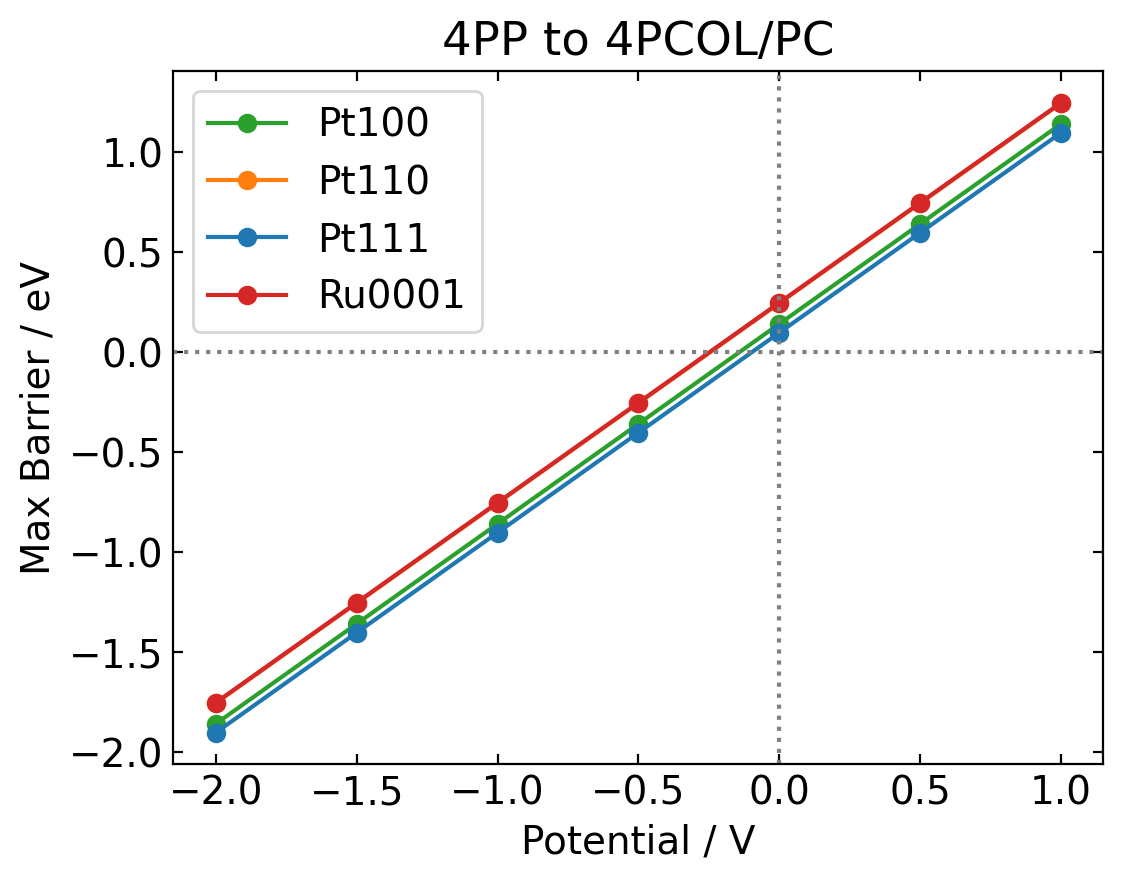

In [7]:
# plot max barrier as a function of potential for each facet
for i,b in enumerate(barsPP):
    plot(Us,b,marker = 'o', color = colors[i], label = surfs[i])
axhline(y=0,linestyle = ':', color = 'gray')
axvline(x=0,linestyle = ':', color = 'gray')
legend()
xlabel('Potential / V')
ylabel('Max Barrier / eV')
title('4PP to 4PCOL/PC')
show()

# Interpolate to find limiting potential

In [8]:
# FF limiting potentials for each facet
ULs_FF = zeros(4)
for i,b in enumerate(barsFF):
    ULs_FF[i] = interp(0,b,Us)
ULs_FF

array([ 0.18546606, -0.09010845,  0.14097088, -0.11201763])

In [9]:
# 4PP limiting potentials for each facet
ULs_PP = zeros(4)
for i,b in enumerate(barsPP):
    ULs_PP[i] = interp(0,b,Us)
ULs_PP

array([-0.14276869, -0.2465916 , -0.09863122, -0.24856787])

In [10]:
# show data table
data = pd.DataFrame({'Surface': surfs,
                    'FF U$_L$ / V vs. RHE': ULs_FF,
                    '4PP U$_L$ / V vs. RHE': ULs_PP})
data

,Surface,FF U$_L$ / V vs. RHE,4PP U$_L$ / V vs. RHE
0,Pt100,0.185466,-0.142769
1,Pt110,-0.090108,-0.246592
2,Pt111,0.140971,-0.098631
3,Ru0001,-0.112018,-0.248568
